In [18]:
import pandas as pd
import pyarrow.parquet as pq
import pyarrow.dataset as ds
pd.__version__

'2.2.3'

In [83]:
path = "/home/tom/data/movie_after/dailyboxoffice"
# path = "/home/tom/data/movies/dailyboxoffice"
dataset = ds.dataset(path, format="parquet", partitioning="hive")

In [84]:
df = dataset.to_table().to_pandas()

In [81]:
df.columns

Index(['rankOldAndNew', 'movieCd', 'movieNm', 'openDt', 'salesAmt',
       'salesInten', 'salesChange', 'salesAcc', 'audiCnt', 'audiInten',
       'audiChange', 'audiAcc', 'scrnCnt', 'showCnt', 'rnum', 'rank', 'dt',
       'multiMovieYn', 'repNationCd'],
      dtype='object')

In [71]:
df.head(3)

,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,rnum,rank,dt,multiMovieYn,repNationCd
0,OLD,20235596,트롤: 밴드 투게더,2023-12-20,273538754.0,-16945147.0,-5.8,3383181955,28988.0,-1952.0,-6.3,365927.0,660.0,981.0,5.0,5.0,20240101,N,F
1,OLD,20235735,아쿠아맨과 로스트 킹덤,2023-12-20,507984981.0,-156026099.0,-23.5,7967584753,49368.0,-14686.0,-22.9,772354.0,832.0,1611.0,4.0,4.0,20240101,N,F
2,OLD,20235980,말하고 싶은 비밀,2023-12-13,38025184.0,-2349427.0,-5.8,868379725,3765.0,-164.0,-4.2,89597.0,95.0,127.0,10.0,10.0,20240101,N,F


In [72]:
# multiMovieYn와 repNationCd의 NaN/None 개수 확인
multiMovieYn_null_count = df['multiMovieYn'].isna().sum()
repNationCd_null_count = df['repNationCd'].isna().sum()

In [73]:
# 전체 행 개수와 비교
total_rows = len(df)
print(f"전체 행 개수: {total_rows}")
print(f"multiMovieYn의 NaN/None 비율: {multiMovieYn_null_count / total_rows:.2%}")
print(f"repNationCd의 NaN/None 비율: {repNationCd_null_count / total_rows:.2%}")

전체 행 개수: 23727
multiMovieYn의 NaN/None 비율: 21.36%
repNationCd의 NaN/None 비율: 16.37%


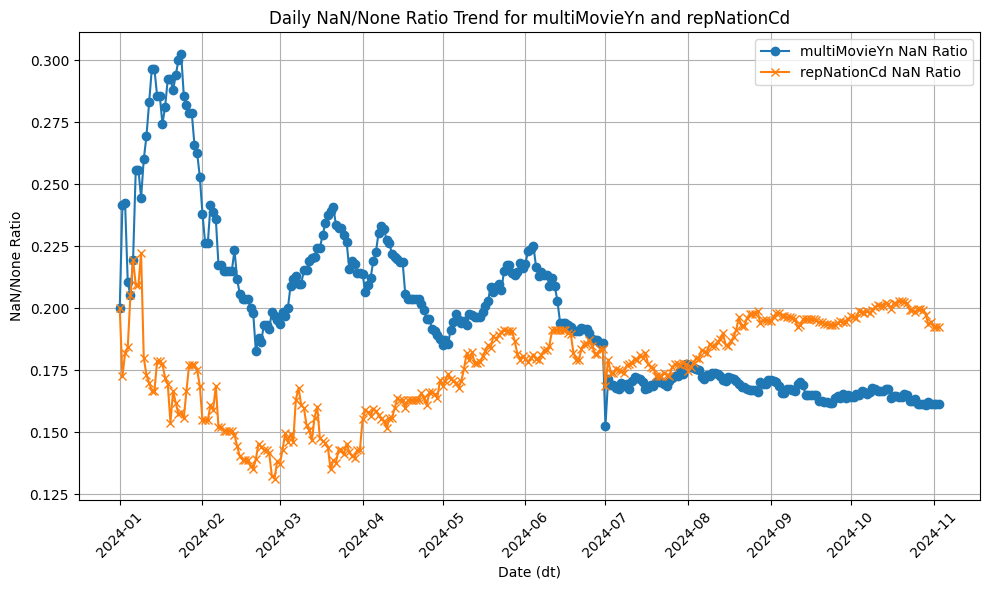

In [82]:
import pyarrow.dataset as ds
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 로드
path = '/home/tom/data/movie_after/dailyboxoffice'
dataset = ds.dataset(path, format="parquet", partitioning="hive")
df = dataset.to_table().to_pandas()

# 2. dt를 기준으로 그룹화하고 NaN/None 비율 계산
# dt 컬럼이 문자열로 되어 있을 수 있으니 필요하면 datetime으로 변환
df['dt'] = pd.to_datetime(df['dt'], format='%Y%m%d', errors='coerce')

# 일자별 NaN 비율 계산
null_ratios = df.groupby('dt').agg(
    multiMovieYn_null_ratio=('multiMovieYn', lambda x: x.isna().mean()),
    repNationCd_null_ratio=('repNationCd', lambda x: x.isna().mean())
).reset_index()

# 3. 결과 출력
# print(null_ratios)

# 4. 그래프 그리기
plt.figure(figsize=(10, 6))

# multiMovieYn 비율 그래프
plt.plot(null_ratios['dt'], null_ratios['multiMovieYn_null_ratio'], label='multiMovieYn NaN Ratio', marker='o')

# repNationCd 비율 그래프
plt.plot(null_ratios['dt'], null_ratios['repNationCd_null_ratio'], label='repNationCd NaN Ratio', marker='x')

# 그래프 설정|
plt.title('Daily NaN/None Ratio Trend for multiMovieYn and repNationCd')
plt.xlabel('Date (dt)')
plt.ylabel('NaN/None Ratio')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 5. 그래프 표시
plt.show()

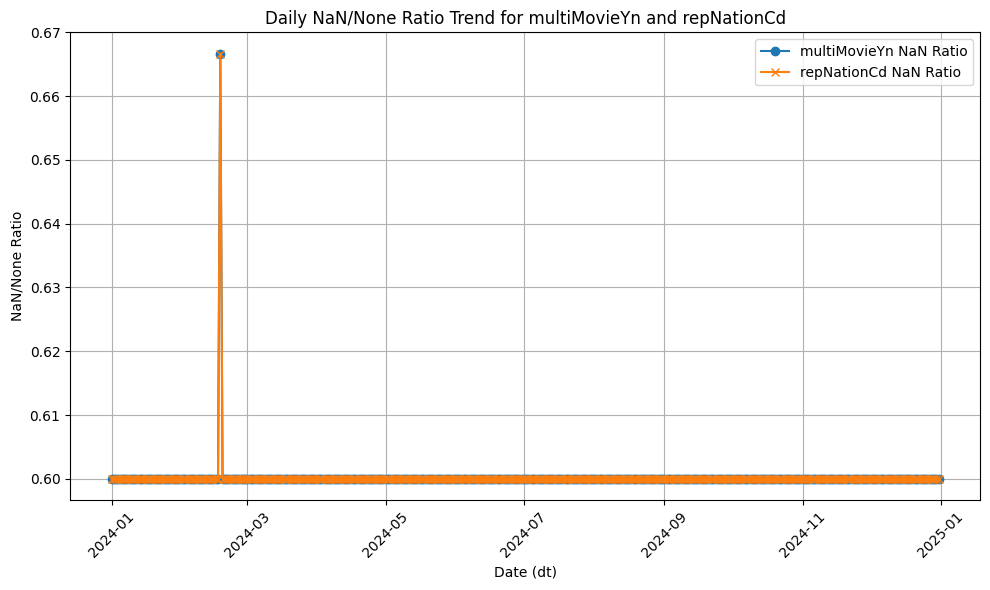

In [78]:
import pyarrow.dataset as ds
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 로드
path = '/home/tom/data/movies/dailyboxoffice'
dataset = ds.dataset(path, format="parquet", partitioning="hive")
df = dataset.to_table().to_pandas()

# 2. dt를 기준으로 그룹화하고 NaN/None 비율 계산
# dt 컬럼이 문자열로 되어 있을 수 있으니 필요하면 datetime으로 변환
df['dt'] = pd.to_datetime(df['dt'], format='%Y%m%d', errors='coerce')

# 일자별 NaN 비율 계산
null_ratios = df.groupby('dt').agg(
    multiMovieYn_null_ratio=('multiMovieYn', lambda x: x.isna().mean()),
    repNationCd_null_ratio=('repNationCd', lambda x: x.isna().mean())
).reset_index()

# 3. 결과 출력
# print(null_ratios)

# 4. 그래프 그리기
plt.figure(figsize=(10, 6))

# multiMovieYn 비율 그래프
plt.plot(null_ratios['dt'], null_ratios['multiMovieYn_null_ratio'], label='multiMovieYn NaN Ratio', marker='o')

# repNationCd 비율 그래프
plt.plot(null_ratios['dt'], null_ratios['repNationCd_null_ratio'], label='repNationCd NaN Ratio', marker='x')

# 그래프 설정|
plt.title('Daily NaN/None Ratio Trend for multiMovieYn and repNationCd')
plt.xlabel('Date (dt)')
plt.ylabel('NaN/None Ratio')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 5. 그래프 표시
plt.show()

In [85]:
df.to_parquet("/home/tom/code/movie-streamlit/data/movie_after_2024.parquet")